<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Enriquez Selena y Johana Salazar  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

## Cargar el Dataset

In [2]:
#Procedemos a cargar las imagenes para lo cual especificamos el nombre del archivo
images_path = "./PROYECTOIAf"
#images_path = "/Users/johan/Downloads/principal/proyectoIA"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMaria', 'PauteKevin', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


## Descripción de la fuente

    Las imagenes se encuantran en una carpeta denominada "proyectoIA",se procede a cargar  imagenes de caracteristicas distintas. Dichas imagenes sera utilizados entrenar el modelo que permita la autenticacion del ususario por medio de un aplicativo.En el cual las imagenes seran entrenadas para la dicha autenticacion.

## Explique el problema a resolver. 

En el siguiente trabajo usamos imagenes que van a ser entrenadas por medio de un algoritmo supervisado. Para lograr esto se crea etiquetas con valores, esa información entrada y salida esperada. La red al entrenar ajustará los pesos de las Neuronas. La red a utilizar es Convolutional Neural Network, por ello necesitamos la libreria keras y tensorflow.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Vamos a trabajar con un total de 3 imagenes por cada estudiante en este caso son 5 personas, dichas imagenes esen en formato png por lo tanto esoecificamos en la ruta. El tamaño que se maneja en las imagenes es de carnet americano. Aunque no tiene todas las mismas medidas con el preproceso se resuelve el problema.

In [4]:
#Especificamos la carpeta donde se va a proceder a realizar el aumento
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copying Image - {} in PROYECTOIA-AUMENTADO/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join("./PROYECTOIA-AUMENTADO/" + class_name, element) 
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_2.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_3.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_4.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_5.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_6.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_7.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00376418_8.jpg in PROYECTOIA-AUMENTADO/Ariel Chabla
Copying Image - L00385770_1.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_2.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_3.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_4.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_5.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_6.jpg in PROYECTOIA-AUMENTADO/ArroboMercy
Copying Image - L00385770_7.jpg in PROYE

In [5]:
"""Se define la rotacion, ancho, desplazamiento, el zoom y el rango de escala"""

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [7]:

"""Creando imagenes aumentadas para la carpeta de Ariel """
#ruta hacia la carpeta
os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Ariel Chabla")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Ariel Chabla', 
            save_format='jpg'):
        i += 1
        #Especificamos el numero de imagenes a aumentar en este caso necesitamos 9 imagenes de cada lado.
        #Para el aumento en cada carpeta serian 30 imagenes.
        if i == 9:      
            break  

In [8]:

"""Creando imagnes aumentadas para la carpeta de ArroboMercy"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [11]:

"""Creando imagnes aumentadas para la carpeta de Barragan"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\BarraganSteven")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'BarraganSteven', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [10]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\CevallosJoan")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'CevallosJoan', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [31]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\GenesisHeredia")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GenesisHeredia', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [13]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\EnriquezSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'EnriquezSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [14]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\GoyesAnthony")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GoyesAnthony', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [15]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [17]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Jordan Espinosa")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jordan Espinosa', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [18]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Jorge Borrero")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jorge Borrero', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [19]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\JoseRuiz")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JoseRuiz', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [20]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\LucioCarlos")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [21]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\MasacheFernando")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MasacheFernando', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [25]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\MelanyLopez")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MelanyLopez', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [23]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\MosqueraLucy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MosqueraLucy', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [27]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Nataly Acosta")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Nataly Acosta', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [28]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\OlallaLuis")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [30]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\ParragaMaria")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ParragaMaria', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [32]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\PauteKevin")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'PauteKevin', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [33]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'RivasSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [35]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\SalazarJohana")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SalazarJohana', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [36]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\Solano Wilmer")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Solano Wilmer', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [38]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\SolorzanoBryan")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SolorzanoBryan', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [39]:

"""Creando imagnes aumentadas para la carpetA"""

os.chdir(r"\Users\johan\Downloads\PROYECTOIA-AUMENTADO\VinicioBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'VinicioBorja', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  


## NLM Filtro para eliminar el ruido de la imagen

In [3]:
"""Procedemos a la eliminacion del ruido de las imagenes en cada una de las carpetas de acada persona """


#os.chdir(r"/Users/johan/Downloads/")
os.chdir(r"/Users/johan/Downloads/")
images_path = "./PROYECTOIA-AUMENTADO"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMaria', 'PauteKevin', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [ ]:
"""De las imagenes aumentadas obtenidas del codigo anterior se procede a procesar cada una con el fin de eliminar el ruido
Especificamos la carpeta del proceso y tambienla carpeta donde se guardan las imagenes sin ruido"""

for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './DESING/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in Ariel Chabla
Processing Image - 2 in Ariel Chabla
Processing Image - 3 in Ariel Chabla
Processing Image - 4 in Ariel Chabla
Processing Image - 5 in Ariel Chabla
Processing Image - 6 in Ariel Chabla
Processing Image - 7 in Ariel Chabla
Processing Image - 8 in Ariel Chabla
Processing Image - 9 in Ariel Chabla
Processing Image - 10 in Ariel Chabla
Processing Image - 11 in Ariel Chabla
Processing Image - 12 in Ariel Chabla
Processing Image - 13 in Ariel Chabla
Processing Image - 14 in Ariel Chabla
Processing Image - 15 in Ariel Chabla
Processing Image - 16 in Ariel Chabla
Processing Image - 17 in Ariel Chabla
Processing Image - 18 in Ariel Chabla
Processing Image - 19 in Ariel Chabla
Processing Image - 20 in Ariel Chabla
Processing Image - 21 in Ariel Chabla
Processing Image - 22 in Ariel Chabla
Processing Image - 23 in Ariel Chabla
Processing Image - 24 in Ariel Chabla
Processing Image - 25 in Ariel Chabla
Processing Image - 26 in Ariel Chabla
Processing Image - 27


## Eliminacion de fondo

In [3]:
images_path = "./DESING"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMaria', 'PauteKevin', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [ ]:
""" Procedemos a eliminar el fondo de todas las imagenes a la
cuales se les elimino el ruido. Dichas imagenes se guardaran en la carpeta proyectoIA_rgb  """
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images ruta de la carpeta
        save_path = './PROYECTOrgb/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in Ariel Chabla
Processing Image - 2 in Ariel Chabla
Processing Image - 3 in Ariel Chabla
Processing Image - 4 in Ariel Chabla
Processing Image - 5 in Ariel Chabla
Processing Image - 6 in Ariel Chabla
Processing Image - 7 in Ariel Chabla
Processing Image - 8 in Ariel Chabla
Processing Image - 9 in Ariel Chabla
Processing Image - 10 in Ariel Chabla
Processing Image - 11 in Ariel Chabla
Processing Image - 12 in Ariel Chabla
Processing Image - 13 in Ariel Chabla
Processing Image - 14 in Ariel Chabla
Processing Image - 15 in Ariel Chabla
Processing Image - 16 in Ariel Chabla
Processing Image - 17 in Ariel Chabla
Processing Image - 18 in Ariel Chabla
Processing Image - 19 in Ariel Chabla
Processing Image - 20 in Ariel Chabla
Processing Image - 21 in Ariel Chabla
Processing Image - 22 in Ariel Chabla
Processing Image - 23 in Ariel Chabla
Processing Image - 24 in Ariel Chabla
Processing Image - 25 in Ariel Chabla
Processing Image - 26 in Ariel Chabla
Processing Image - 27

## Carga y exploracion de datos

In [78]:
""" Empezamos a trabajar con as imagenes ya procesadas anteriormente,por cada persona tenemos 5 clases. """

fpath = './rgbproy'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'PauteKevin', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'VinicioBorja'] 

No. of categories =  21


Para este paso procedemos a definir las categorias, los estudisntes elegidos tienen cada una de sus fotos almacenados en carpetas. Por ello a las imagenes anterirmente procesadas y eliminadas el fondo seras con las que trabajamos. Para cada uno selecionamos una categoria que va a ser identificada medinte el nombre de cada uno.  

In [83]:
""" Se agrega etiquetas para cada una de las categorias ya especificadas anteriormente, con un total de 
153 etiquetas sumando todas las clases"""

#Se agrega etiquetas para cada una de las categorias ya especificadas anteriormente
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1877 
No. of labels loaded =  1877
<class 'list'> <class 'list'>


In [96]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1877,) 
Labels shape =  (1877,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


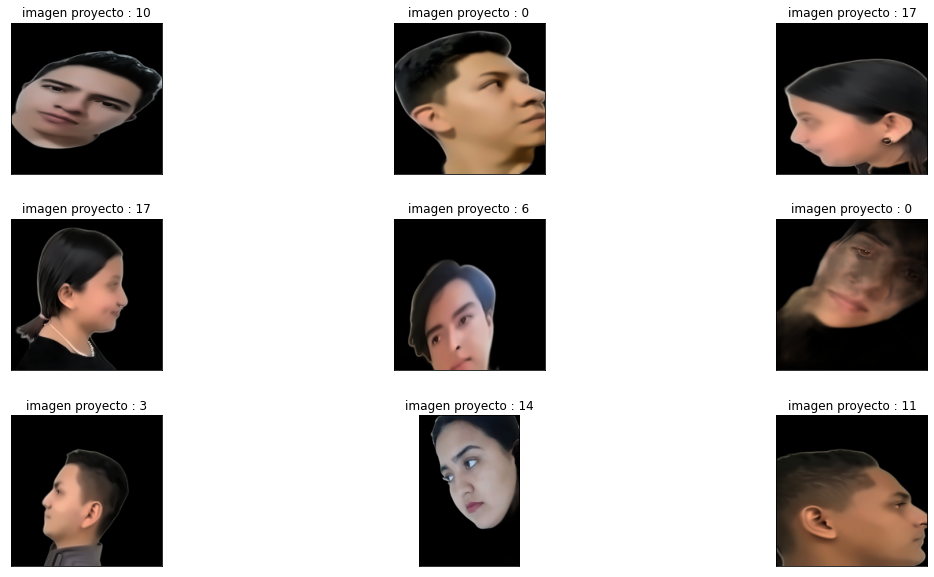

In [53]:
"""Mediante un plot extraemos imagenes aleatorias y las etiquetamos como imagen proyecto y el numero identificador"""
def display_rand_images(images, labels):

    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('imagen proyecto : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)


## Preparar datos para entrenar el modelo CNN

In [54]:

""" El paso n.º 1 en la reorganización de datos obtener números igualmente espaciados en un rango dado  """
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1874 1875 1876]

'n' values after shuffling =  [ 950 1351    2 ...  638  348  382]


In [55]:
"""#2-paso en el barajado de datos
imágenes aleatorias y datos de etiquetas correspondientes en ambas listas"""

images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1877,) 
Labels shape after shuffling =  (1877,)


In [ ]:
"""Conversion de las imagenes escalares con matrices de tamaño 1"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

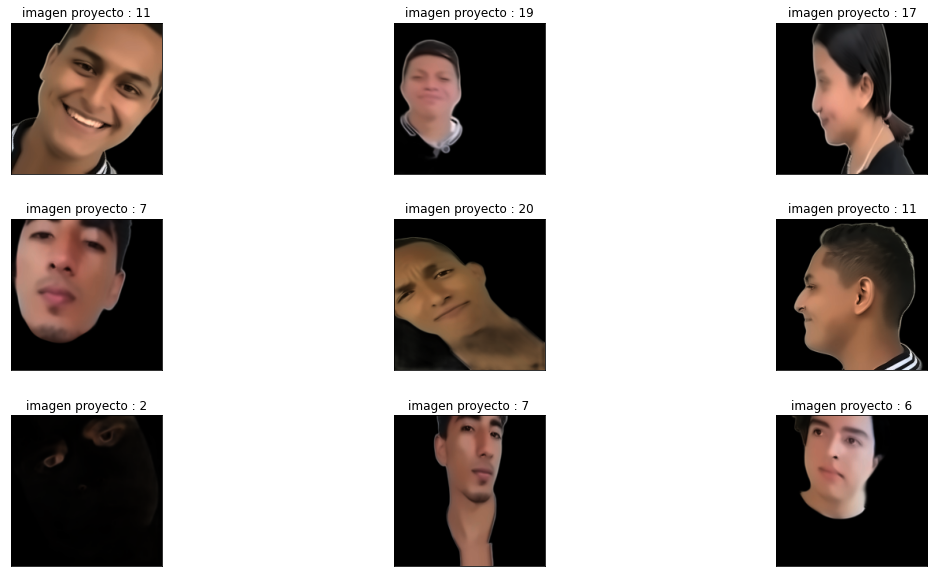

In [95]:
display_rand_images(images, labels)

In [97]:
""" se define la cantidad de datos tanto oara el entrenamiento como para las pruebas con un valor de 80 y 20"""

train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (1501,)
train_labels shape =  (1501,)

test_ds shape =  (376,)
test_labels shape =  (376,)


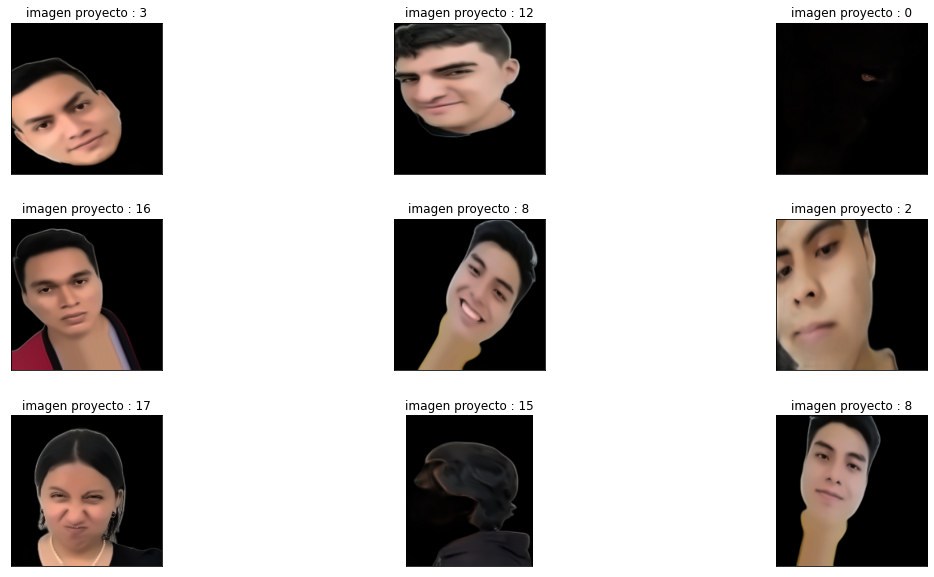

In [98]:
display_rand_images(train_ds, train_labels)

##  AlexNet CNN Arquitectura 

Para el reconocimiento de las imagenes se utiliza AlexNet. Resuelve el problema de la clasificación de imágenes con un subconjunto del conjunto de datos de ImageNet, procesar datos de píxeles. Para esta arquitectura usamos 5 capas convolucionales y 3 capas totalmente conectadas.Lo cual especificamos para cada uno de las etiquetas anteriormente detalladas.

In [99]:
#Programando las capas de la arquitectura AlexNet

In [100]:
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#Conv2D = Aplica una convolución 2D sobre una señal de entrada compuesta por varios planos de entrada
#MaxPooling2D = tipo de capa que usa una red convolucional para reconocimiento de imágenes 
#Dense = Las capas Dense son la capas de cálculo de que conectan cada neurona en una capa con todas las salidas de la capa anterior.
#Flatten = La función Flatten agrega argumentos en el orden en que se incluyen en la fórmula.
#Dropout = El dropout se ha utilizado desde su concepción como un método de regularización de los modelos.

#Código que responde a la descripción anterior
#Instanciamos el modelo
model=Sequential()
#Primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
# Primera capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
#2 Segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 Segunda  capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
# Tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
# Cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Tercers capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion pro lote
model.add(BatchNormalization())
#Redimensionar el modelo AlexNet
model.add(Flatten())
#Primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#Segunda capa de densidad
model.add(Dense(4096,activation="relu"))
#Regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lotes
model.add(BatchNormalization())
#Tercera capa de densidad
model.add(Dense(1000,activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#capa de salida
model.add(Dense(20,activation="softmax"))
#resumen
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 384)        

SE APLICA EARLY STOP

Aplicamos la detención temprana que es un método que le permite especificar una gran cantidad arbitraria de épocas de entrenamiento y detener el entrenamiento una vez que el rendimiento del modelo deja de mejorar en un conjunto de datos de validación de espera.

es= EarlyStopping(monitor='val_loss',mode ='min',verbose=1,patience =200)

In [111]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print('Accuracy: 48.19')

In [142]:
np.array(train_ds) 


array([array([[[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               ...,
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]],

              [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               ...,
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]],

              [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               ...,
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]],

              ...,

              [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               ...,
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]],

              [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               ...,
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]],

              [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
            

In [ ]:
%%time 
model.fit(train_ds.values,train_labels, epochs=50,validation_data=(test_ds, test_labels),callbacks=[es]) #Uso del método fit para los valores de entramiento

In [ ]:
loss, accuracy = model.evaluate(test_ds, test_labels) #Perdida y precisión, en la imágen de test y las etquetas de test
print(loss,accuracy) #Mostramos la perdidad y la precisión

In [ ]:
pred = model.predict(test_ds) #Instanciamos la clase model.predict y mandamos por parametro el test
pred.shape #mostramos la prediccion

In [8]:


"""Pasarlo a una capa densa"""
model.add(Flatten())


"""# 1ra Capa Densa"""
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))


""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


"""2da Capa Densa"""
model.add(Dense(4096))
model.add(Activation('relu'))

""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

"""capa de salida"""
model.add(Dense(1000))

model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0